In [1]:
# !pip install pylibjpeg-libjpeg


  Using cached pylibjpeg_libjpeg-2.0.0.tar.gz (667 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pylibjpeg-libjpeg: filename=pylibjpeg_libjpeg-2.0.0-cp311-cp311-macosx_14_0_arm64.whl size=516557 sha256=81ea2447c3df417f378cf6e0eb66f10a1c97994ee5d17a1066b7fd79d458f66d
  Stored in directory: /Users/msk/Library/Caches/pip/wheels/a3/cb/d5/3aadcfd905aaa5d9e8d25557ff16f8a6c3a858fcee6f06098f
Successfully built pylibjpeg-libjpeg


In [3]:
# !pip install pydicom

  Obtaining dependency information for pydicom from https://files.pythonhosted.org/packages/35/2a/8c0f6fe243e6b6793868c6834203a44cc8f3f25abad780e1c7b21e15594d/pydicom-2.4.4-py3-none-any.whl.metadata
  Using cached pydicom-2.4.4-py3-none-any.whl.metadata (7.8 kB)
Using cached pydicom-2.4.4-py3-none-any.whl (1.8 MB)


In [2]:
# !pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/77/df/b56175c3fb5bc058774bdcf35f5a71cf9c3c5b909f98a1c688eb71cd3b1f/opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl (35.4 MB)


In [1]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import os
import io
import base64
import pydicom
import numpy as np
from PIL import Image
import cv2


In [2]:
filename = "./Data/MR.1.2.410.200013.1.510.1.20230207180204298.93738.dcm"
filenameDetail = "MR.1.2.410.200013.1.510.1.20230207180204298.93738.dcm"
dcm = pydicom.dcmread(filename)
print(dcm)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.410.200013.1.510.1.20230207180204298.93738
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.30071.8
(0002, 0013) Implementation Version Name         SH: 'fo-dicom 4.0.8'
(0002, 0016) Source Application Entity Title     AE: 'PPIMPORT'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS2D', 'FM', 'FIL', 'COMP_PT', 'COMPOSED']
(0008, 0012) Instance Creation Date              DA: '2013

In [3]:
windowCenter = dcm.WindowCenter
windowWidth = dcm.WindowWidth
print(windowWidth)

2574


In [4]:
min_window_center = dcm.WindowCenter - dcm.WindowWidth / 2.0
max_window_center = dcm.WindowCenter + dcm.WindowWidth / 2.0

print(min_window_center)
print(max_window_center)


-208.0
2366.0


In [5]:
window_center_range = (min_window_center, max_window_center)
print(window_center_range)

(-208.0, 2366.0)


In [6]:
def convert_file(dcm_file_path, x, y ,png_file_path):
    dcm = pydicom.dcmread(dcm_file_path)
    img = dcm.pixel_array.astype(float)
    scaled_image = cv2.convertScaleAbs(img - x, alpha=(255.0 /y))
    # print(scaled_image)
    scaled_image_to_image = Image.fromarray(scaled_image)
    # print(scaled_image_to_image)
    scaled_image_to_image.save(png_file_path,'png')
    # cv2.imwrite(png_file_path, scaled_image_to_image)

In [7]:
# # 한장씩 그리기
# convert_file(filename, windowCenter, windowWidth, f"./")

In [8]:
# convert_file(filename, windowCenter, windowWidth, f"./TestPng/{filenameDetail}/{filenameDetail}_image.png")

In [16]:
for i in range(151):
    start_value = window_center_range[0]
    print(start_value)
    end_value = window_center_range[1]
    print(end_value)
    step = (end_value - start_value) / 150.0
    print(step)
    window_center = start_value + i * step
    print(f"{i}번째{window_center}")
    

-208.0
2366.0
17.16
0번째-208.0
-208.0
2366.0
17.16
1번째-190.84
-208.0
2366.0
17.16
2번째-173.68
-208.0
2366.0
17.16
3번째-156.51999999999998
-208.0
2366.0
17.16
4번째-139.36
-208.0
2366.0
17.16
5번째-122.2
-208.0
2366.0
17.16
6번째-105.03999999999999
-208.0
2366.0
17.16
7번째-87.88
-208.0
2366.0
17.16
8번째-70.72
-208.0
2366.0
17.16
9번째-53.56
-208.0
2366.0
17.16
10번째-36.400000000000006
-208.0
2366.0
17.16
11번째-19.24000000000001
-208.0
2366.0
17.16
12번째-2.079999999999984
-208.0
2366.0
17.16
13번째15.080000000000013
-208.0
2366.0
17.16
14번째32.24000000000001
-208.0
2366.0
17.16
15번째49.39999999999998
-208.0
2366.0
17.16
16번째66.56
-208.0
2366.0
17.16
17번째83.72000000000003
-208.0
2366.0
17.16
18번째100.88
-208.0
2366.0
17.16
19번째118.04000000000002
-208.0
2366.0
17.16
20번째135.2
-208.0
2366.0
17.16
21번째152.36
-208.0
2366.0
17.16
22번째169.51999999999998
-208.0
2366.0
17.16
23번째186.68
-208.0
2366.0
17.16
24번째203.84000000000003
-208.0
2366.0
17.16
25번째221.0
-208.0
2366.0
17.16
26번째238.16000000000003
-208.0
2366.0
17.

# 여기부터 수정하면 됌.


In [86]:
# make directory
# os.mkdir(f"./TestPng/{filenameDetail}150")

os.mkdir(f"./TestPng/5")

#default Image
convert_file(filename, windowCenter, windowWidth, f"./TestPng/5/defaultImage.png")


for i in range(6):
    start_value = window_center_range[0]
    # print(start_value)
    end_value = window_center_range[1]
    # print(end_value)
    step = (end_value - start_value) / 5.0
    # print(step)
    window_center = start_value + i * step
    
    x = window_center
    y = windowWidth
    # ouput_path = os.path.join("./TestPng/", f"{filename}_img_{i}.png")
    convert_file(filename, x, y, f"./TestPng/5/{i:03d}img.png")

In [36]:
# # 이미지가 있는 폴더 경로
# folder_path = f"./TestPng/100{filenameDetail}/"

# # 폴더 내의 모든 파일 가져오기
# files = os.listdir(folder_path)

# # 이미지 파일만 필터링
# image_files = [file for file in files if file.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# # 그림을 표시할 이미지 크기 및 배열 크기 설정
# image_size = (50, 50)  # 이미지 크기
# grid_size = (10, 10)   # 그리드 크기



/var/folders/v_/bf2rrxk92gj4n08_qh11ks9r0000gn/T/ipykernel_2038/3192276771.py:24: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(image_size, Image.ANTIALIAS)


In [87]:
folder_path = f"./TestPng/5/"

In [88]:
def combine_images_in_folder(folder_path):
    files = os.listdir(folder_path)

    files = sorted(files)

    # 한 줄에 10개씩 이미지 배열
    n = len(files)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10

    # 이미지를 표시할 플롯 생성
    fig, axs = plt.subplots(rows, cols, figsize=(15, 3 * rows))

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                img_path = os.path.join(folder_path, files[i * 10 + j])
                img = Image.open(img_path)
                axs[i, j].imshow(img, cmap='gray_r')
                axs[i, j].axis('off')

                # 이미지 파일 이름을 표시
                axs[i, j].set_title(files[i * 10 + j])

    plt.show()


# 예시 사용법
# folder_path = "./TestPng/150/"
# combine_images_in_folder(folder_path)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

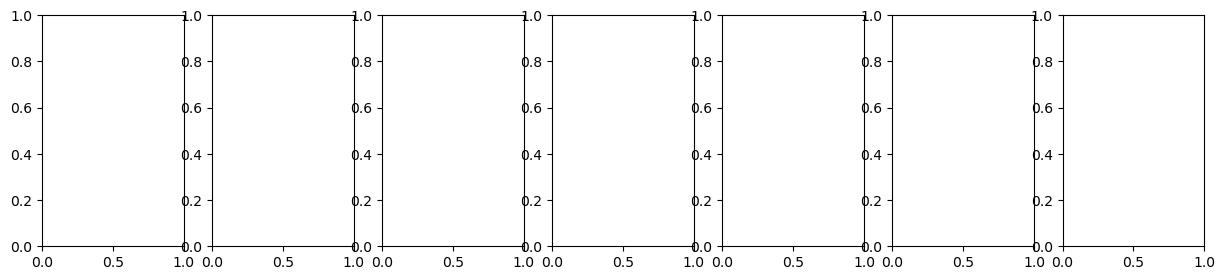

In [89]:
combine_images_in_folder(folder_path)